## Predictive Model for Fare Amount and Tip Amount

<i>Here, the first predictive model was built for fare amount and then the second model was built to predict tip amount. In both cases, candidate models were first built using sklearn pipeline to assemble several steps, cross validate and tune model hyperparameters before finally selecting the best model using randomised and grid search.  </i>

In [1]:
# Import all the libaries you need

import os
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sqlite3
from scipy.stats.mstats import winsorize
sns.set_style('darkgrid')
import matplotlib.pyplot as plt
import matplotlib.cm

# from mpl_toolkits.basemap import Basemap

from matplotlib.patches import Polygon
from matplotlib.collections import PatchCollection
from matplotlib.colors import Normalize

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)


df_data = pd.read_csv("Copy of trip_data_4.csv")
df_data.columns = df_data.columns.str.replace(' ', '')


del df_data['Unnamed:0']

df_data.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082


### Changing Pickup Datetime to standard date/time format

In [2]:
df_data['pickup_datetime'] = pd.to_datetime(df_data['pickup_datetime'], format='%Y-%m-%d')
 

In [3]:
df_fare = pd.read_csv("Copy of trip_fare_4.csv")
df_fare.columns = df_fare.columns.str.replace(' ', '')


del df_fare['Unnamed:0']

df_fare.head()

,medallion,hack_license,vendor_id,pickup_datetime,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,2013-04-04 18:47:45,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,2013-04-05 07:08:34,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,2013-04-04 17:59:50,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,2013-04-04 18:12:01,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,2013-04-04 20:12:57,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [4]:
df_fare['pickup_datetime'] = pd.to_datetime(df_fare['pickup_datetime'], format='%Y-%m-%d')


### Joining the two dataframes (Trip data and Fare data) Using pandas Merge

In [5]:
df = pd.merge(df_data, df_fare,  how='inner', left_on=['medallion','hack_license','vendor_id','pickup_datetime'], right_on = ['medallion','hack_license','vendor_id','pickup_datetime'])
df.columns = df.columns.str.replace(' ', '')
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20


In [6]:
df.shape

(1000018, 21)

## Preprocessing and Feature Engineering

<i>Here, more preprocessing is done to prepare the dataset for the model stage. First, we check for null values and then do some feature engineering on the date/time to put it in a proper format for training. Also, a correlation plot is plotted to check what feature are correlated with the target variable before model building.</i>

In [7]:
df.isna().sum()

medallion                  0
hack_license               0
vendor_id                  0
rate_code                  0
store_and_fwd_flag    552446
pickup_datetime            0
dropoff_datetime           0
passenger_count            0
trip_time_in_secs          0
trip_distance              0
pickup_longitude           0
pickup_latitude            0
dropoff_longitude          0
dropoff_latitude           0
payment_type               0
fare_amount                0
surcharge                  0
mta_tax                    0
tip_amount                 0
tolls_amount               0
total_amount               0
dtype: int64

Here, we checked for null values. But since there are no null values in the features we'll be using for training, we can continue

In [8]:
# Let's codify time of day and day of week
df['pickup_hour'] = df.pickup_datetime.dt.hour
df.dropoff_datetime = pd.to_datetime(df.dropoff_datetime)
df['dropoff_hour'] = df.dropoff_datetime.dt.hour

# 0 = Monday and 6 = Sunday
df['dayofweek'] = df.pickup_datetime.dt.dayofweek

# Day of Month
df['dayofmonth'] = df.pickup_datetime.dt.day
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,dropoff_hour,dayofweek,dayofmonth
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00,18,19,3,4
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80,7,7,4,5
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60,17,18,3,4
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95,18,18,3,4
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20,20,20,3,4


In [9]:
# Calculate the average taxi speed per hour
taxidf2 = df.groupby(['medallion','dayofmonth','pickup_hour'])\
                .agg({'trip_distance':sum})\
                .rename(columns={'trip_distance':'avgspd_in_hour'}).reset_index()
df = df.merge(taxidf2, on=['medallion','dayofmonth','pickup_hour'])
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,dropoff_hour,dayofweek,dayofmonth,avgspd_in_hour
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00,18,19,3,4,2.5
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80,7,7,4,5,1.6
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60,17,18,3,4,3.6
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95,18,18,3,4,1.9
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20,20,20,3,4,3.6


In [10]:
taxidf3 = df.groupby(['medallion','dayofmonth','pickup_hour'])\
                        .agg({'rate_code':len})\
                        .rename(columns={'rate_code':'trips_per_hour'}).reset_index()
df = df.merge(taxidf3, on=['medallion','dayofmonth','pickup_hour'])
df.head()

,medallion,hack_license,vendor_id,rate_code,store_and_fwd_flag,pickup_datetime,dropoff_datetime,passenger_count,trip_time_in_secs,trip_distance,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,payment_type,fare_amount,surcharge,mta_tax,tip_amount,tolls_amount,total_amount,pickup_hour,dropoff_hour,dayofweek,dayofmonth,avgspd_in_hour,trips_per_hour
0,91F6EB84975BBC867E32CB113C7C2CD5,AD8751110E6292079EB10EB9481FE1A6,CMT,1,N,2013-04-04 18:47:45,2013-04-04 19:00:25,1,759,2.5,-73.957855,40.765320,-73.976273,40.785648,CRD,11.0,1.0,0.5,2.50,0.0,15.00,18,19,3,4,2.5,1
1,EC34CD1B3797DFAFF3FE099BA87B6656,8FE6A4AEDF89B6B4E19D2377FD3FB7D7,CMT,1,N,2013-04-05 07:08:34,2013-04-05 07:17:34,1,540,1.6,0.000000,0.000000,0.000000,0.000000,CRD,8.5,0.0,0.5,1.80,0.0,10.80,7,7,4,5,1.6,1
2,C1B9DA774DC2BBC6DE27CE994E7F44A0,E1B595FD55E4C82C1E213EB17438107A,CMT,1,N,2013-04-04 17:59:50,2013-04-04 18:21:48,1,1318,3.6,-73.982880,40.754990,-74.009186,40.715374,CRD,16.5,1.0,0.5,3.60,0.0,21.60,17,18,3,4,3.6,1
3,9BA84250355AB3FC031C9252D395BF8A,16BB0D96A0DCC853AEC7F55C8D6C71E0,CMT,1,N,2013-04-04 18:12:01,2013-04-04 18:25:24,1,799,1.9,-73.978119,40.763451,-73.955666,40.776642,CRD,10.0,1.0,0.5,3.45,0.0,14.95,18,18,3,4,1.9,1
4,205A696DF62AD03C88DA8C5EC5248639,579C41EA5EC846F8B641A42F9EE3E855,CMT,1,N,2013-04-04 20:12:57,2013-04-04 20:29:55,1,1017,3.6,-74.006371,40.744755,-73.961662,40.761082,CRD,15.0,0.5,0.5,3.20,0.0,19.20,20,20,3,4,3.6,1


### Correlation Plot

<AxesSubplot:>

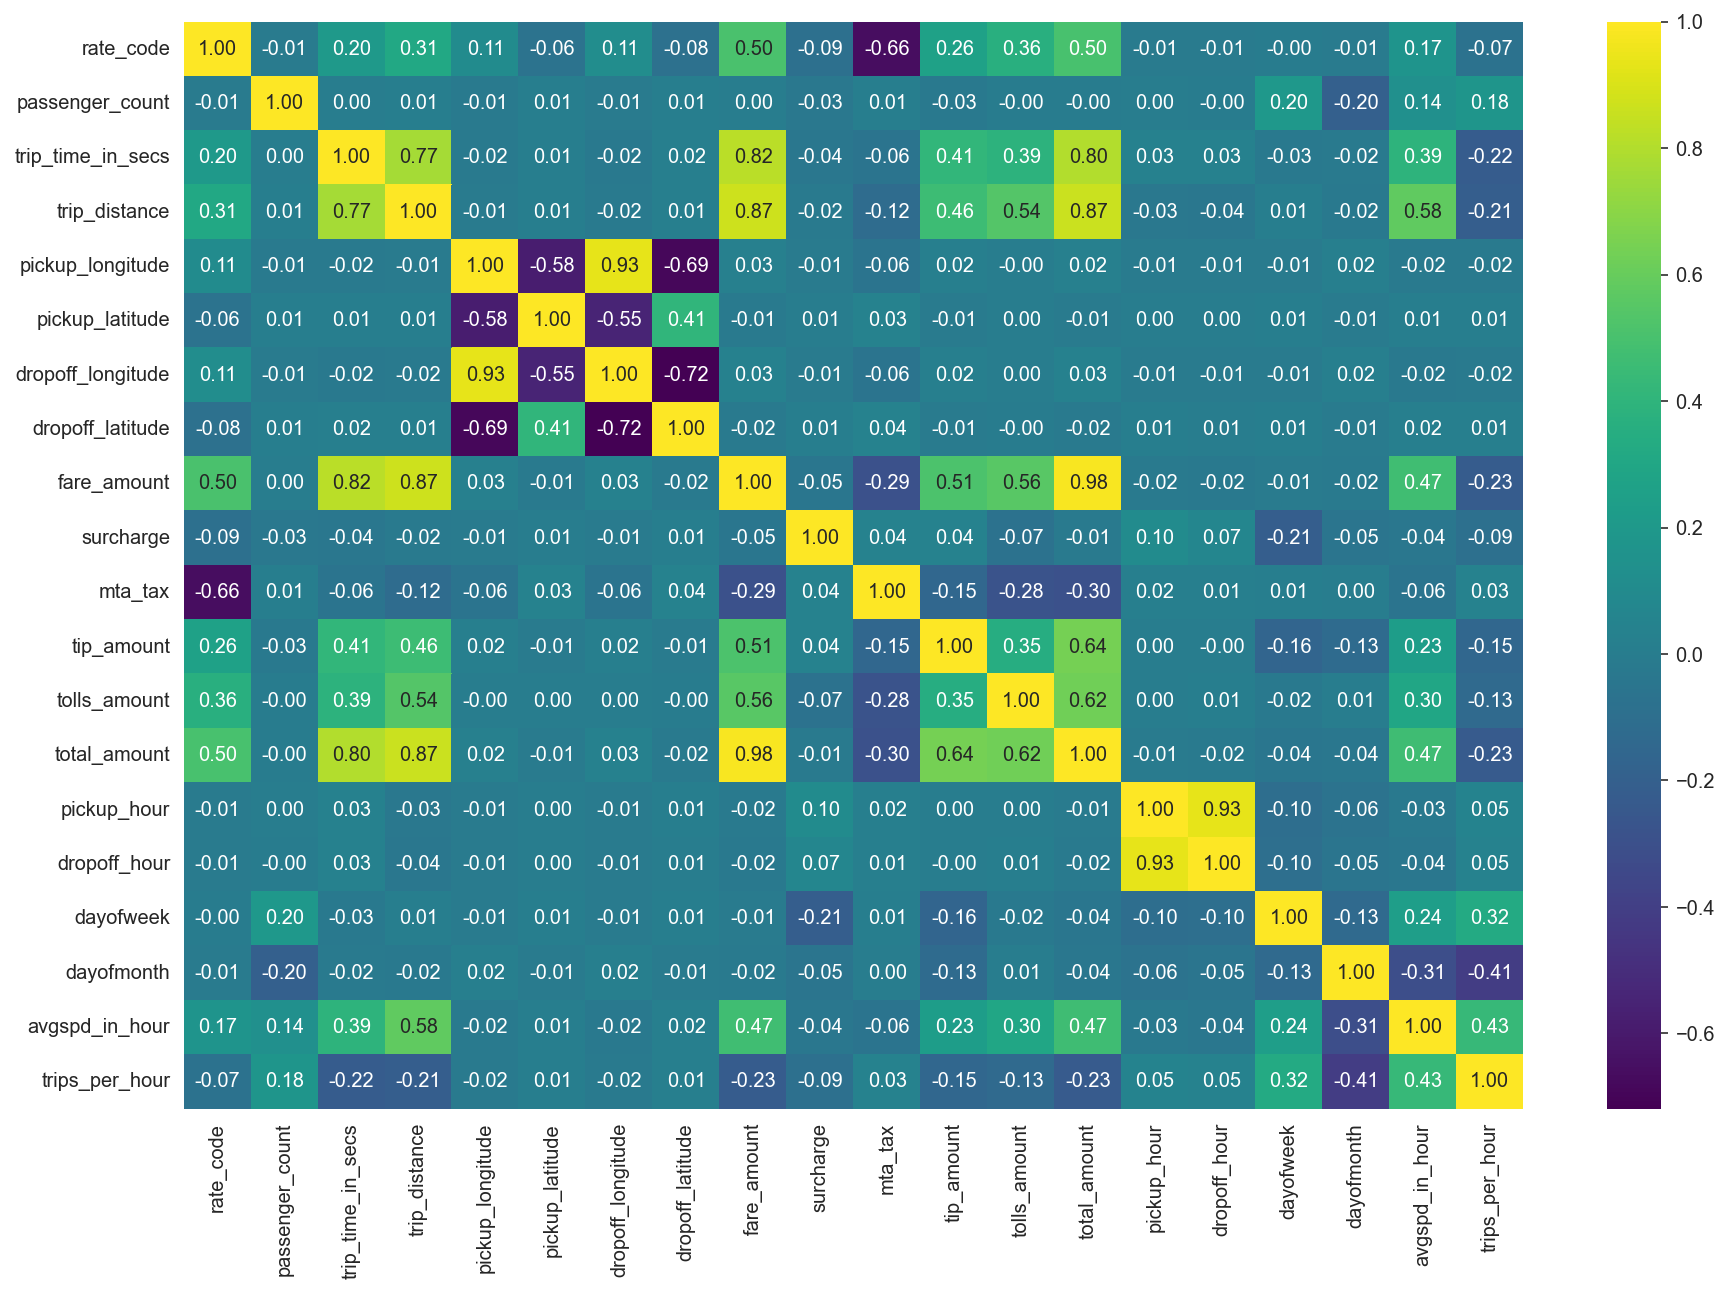

In [11]:
plt.figure(figsize=(15,10))
sns.heatmap(df.corr(), annot = True, fmt = '.2f', cmap = 'viridis')

Fare Amount is correlated with:

- trip time in secs
- trip distance
- tip_amount
- tolls_amount
- avgspd_in_hour
- rate_code
- total_amount

Despite the fact that the above listed features are highly correlated with fare amount, not everyone of them are realistic. Take a look at total amount and tip amount, these features, only occur after the fare amount has been generated. On this note, we'll not be including them in our training set.

## Baseline Model

## Predicting Fare Amount

In [12]:
#Select random two hundred thousand records

import random
import numpy as np
random_idx = np.random.choice(1000018,replace=False, size=200000)
df_new = df.iloc[random_idx]
df_new.shape

(200000, 27)

### Create Training and Test set

In [13]:
X = df[['avgspd_in_hour','trips_per_hour','trip_distance','pickup_hour',
                      'dropoff_hour','dayofweek','dayofmonth', 'tolls_amount','trip_time_in_secs']]
y = df.fare_amount

In [14]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 42)


In [15]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(700012, 9)
(300006, 9)
(700012,)
(300006,)


### Scikit Learn Pipeline

In [19]:
import warnings
import statsmodels.api as sm
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")
plt.style.use("fivethirtyeight")
from sklearn.model_selection import train_test_split
%matplotlib inline
from sklearn.metrics import *
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, RANSACRegressor, TheilSenRegressor, Lasso, Ridge, ElasticNet, SGDRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import GradientBoostingRegressor
from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.tsaplots import plot_acf

### Testing Different Regression Algorithms to choose the best one


In [20]:
lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
rb_pipeline = Pipeline([("scaler", StandardScaler()), ("robust_regression", RANSACRegressor(random_state = 42))])
thiel_pipeline = Pipeline([("scaler", StandardScaler()), ("thiel_regressor", TheilSenRegressor(random_state = 42))])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
elastic_pipeline = Pipeline([("scaler", StandardScaler()), ("elastic_net", ElasticNet(random_state = 42))])
decisiontree_pipeline = Pipeline([("scaler", StandardScaler()), ("decisiontree_regression", DecisionTreeRegressor(random_state = 42))])
sgc_pipeline = Pipeline([("scaler", StandardScaler()), ("sgd_regression", SGDRegressor(random_state = 42))])

In [21]:
pipelines = [lr_pipeline, rb_pipeline, thiel_pipeline, ridge_pipeline, lasso_pipeline,
            elastic_pipeline, decisiontree_pipeline, sgc_pipeline]

In [22]:
pipe_dict = {0: "Linear Regression", 1: "Robust", 2: "Theil Sen", 3: "Ridge",
            4: "Lasso", 5: "ElasticNet", 6: "Decision Tree", 7: "SGD"}

In [23]:
scores_df = pd.DataFrame(columns = ["Model", "CVScores"])

In [24]:
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, X, y, cv = 2)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.8206999171073246
Robust :  0.8141075168456708
Theil Sen :  0.6100754448442282
Ridge :  0.8207001156211902
Lasso :  0.8007087770940715
ElasticNet :  0.7753928868436407
Decision Tree :  0.6920723483853344
SGD :  0.818682740329332


Based on the above cross validation, we can see that Linear Regression, Ridge, Lasso, Ridge, decision tree, SGD works best among all the models. But for our model, we will choose Linear Regression, Ridge & Lasso Regression Models to perform hyperparameter tuning to find the best model among three.

In [25]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", LinearRegression())])

In [26]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [27]:
grid_params = [
    {"classifier": [LinearRegression()],
    "classifier__normalize": [True, False]},
    {"classifier": [Ridge()],
     "classifier__alpha": np.arange(0.5, 5, 0.25),
     "classifier__fit_intercept": [True, False],
     "classifier__normalize": [True, False],
     "classifier__max_iter": [50, 100, 500, 1000, 2500],
     "classifier__tol": [0.001, 0.01, 0.05, 0.1, 1, 5, 10],
     "classifier__solver": ["auto", "svd", "cholesky", "lsqr", "sparse_cg,", "sag", "saga"]
    },
    {"classifier": [Lasso()],
    "classifier__alpha": np.arange(0.5, 5, 0.25),
    "classifier__fit_intercept": [True, False],
    "classifier__normalize": [True, False],
    "classifier__max_iter": [50, 100, 500, 1000, 2500],
    "classifier__tol": [0.0001, 0.001, 0.005, 0.01, 0.05, 0.1, 1, 5, 10],
    "classifier__warm_start": [True, False],
    "classifier__positive": [True, False],
    "classifier__selection": ["cyclic", "random"]}
]

### Cross Validation - Randomized Search CV


In [28]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 5, verbose = 10, random_state = 42)

In [29]:
best_model = random_search.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   5 tasks      | elapsed:    6.9s
[Parallel(n_jobs=-1)]: Done  10 tasks      | elapsed:    7.8s
[Parallel(n_jobs=-1)]: Done  17 tasks      | elapsed:   10.3s
[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:   14.4s
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:   16.6s
[Parallel(n_jobs=-1)]: Done  50 out of  50 | elapsed:   17.8s finished


In [30]:
best_model.best_params_

{'classifier__tol': 5,
 'classifier__solver': 'sag',
 'classifier__normalize': False,
 'classifier__max_iter': 1000,
 'classifier__fit_intercept': True,
 'classifier__alpha': 2.0,
 'classifier': Ridge(alpha=2.0, max_iter=1000, solver='sag', tol=5)}

In [31]:
pipeline_ridge = Pipeline([('scaler', StandardScaler()), ('ridge_reg', Ridge(alpha = 4.75, fit_intercept=True, 
                                                                             max_iter=100, normalize=False, tol = 10, solver='sag'))])

In [32]:
model = pipeline_ridge.fit(X_train, y_train)

In [33]:
predict = model.predict(X_test)

In [34]:
resid = (y_test - predict)

### Prediction Diagnosis and evaluation

In [35]:
def print_evaluate(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2_square = r2_score(true, prediction)

    print("MAE: {}".format(mae))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("R2 Square: {}".format(r2_square))

In [36]:
def plot_diag(true, prediction):
    
    #residuals
    resid = (true-prediction)
    
    #plotting the distplot
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.title("Distplot")
    sns.distplot(resid)
    
    #plotting the residual plot
    plt.subplot(222)
    plt.title("Residual Plot")
    sns.scatterplot(prediction, resid)
    sns.lineplot([min(prediction), max(prediction)], y = [0,0], linestyle = '--', color = 'r')
    
    #plotting the quantile plot
    ax = plt.subplot(223)
    plt.title("Quantile Plot")
    sm.qqplot(resid, line = 'r', ax = ax)
    
    #plotting the autocorrelation plot
    ax2 = plt.subplot(224)
    plt.title("Autocorrelation Plot")
    plot_acf(resid, ax = ax2)
    plt.tight_layout()

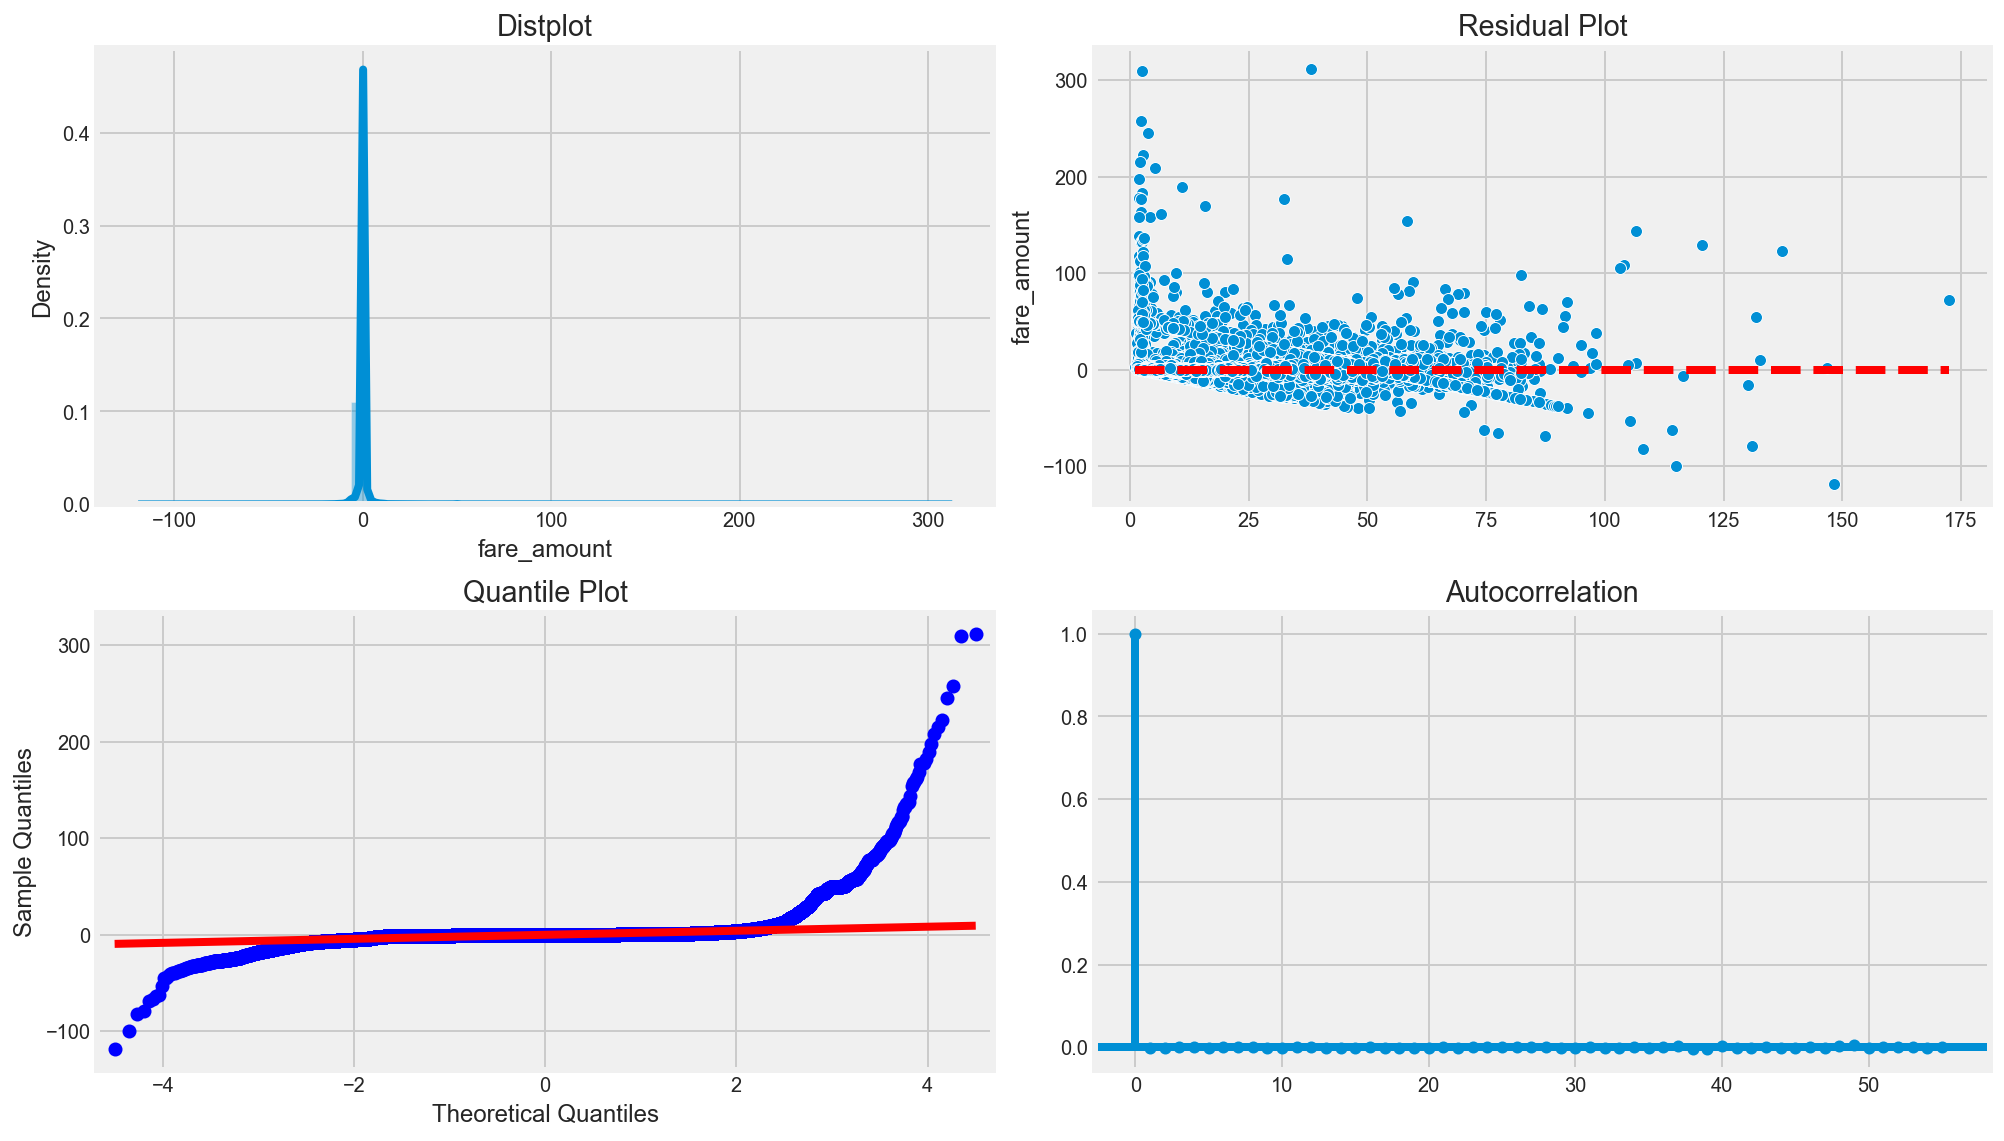

In [37]:
plot_diag(y_test, predict)

<AxesSubplot:xlabel='fare_amount'>

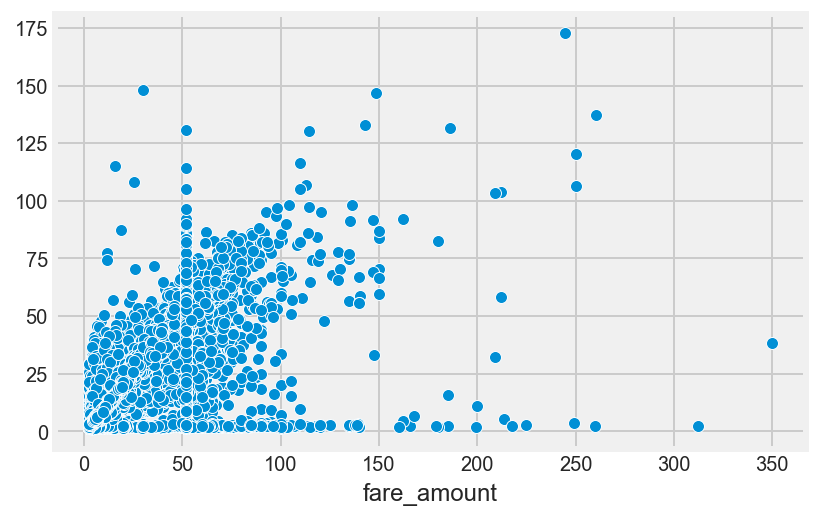

In [38]:
sns.scatterplot(y_test, predict)

In [39]:
print_evaluate(y_test, predict)

MAE: 1.0776928408896473
MSE: 16.43680388425184
RMSE: 4.054232835476009
R2 Square: 0.8315623052924456


In [40]:
X_test["Predicted Price"] = predict

In [41]:
X_test["Original Price"] = y_test

### Comparing Predicted Price with the Original Price

In [42]:
rounder = lambda a: [round(x,2) for x in a]
X_test["Predicted Price"] = rounder(X_test["Predicted Price"])

In [43]:
X_test.head(10)

,avgspd_in_hour,trips_per_hour,trip_distance,pickup_hour,dropoff_hour,dayofweek,dayofmonth,tolls_amount,trip_time_in_secs,Predicted Price,Original Price
277549,5.64,4,2.16,22,22,5,13,0.00,540,9.23,9.0
582374,6.21,2,5.79,22,22,6,14,0.00,1320,20.76,20.5
973855,4.50,2,3.00,0,1,1,23,0.00,1159,15.38,13.0
492882,9.70,2,2.70,16,17,6,14,0.00,840,12.49,10.5
633291,5.60,3,1.90,9,9,1,16,0.00,841,11.25,11.0
116573,1.14,1,1.14,9,9,5,13,0.00,300,6.37,6.5
780005,2.50,1,2.50,16,17,6,28,0.00,790,11.38,11.0
565535,8.90,1,8.90,17,18,4,19,0.00,1836,29.34,29.5
654279,1.40,1,1.40,14,14,2,17,0.00,338,6.63,6.5
805241,10.30,1,10.30,17,17,6,28,5.33,2000,39.55,32.5


## Predicting Tip Amount

In [44]:
#Select random two hundred thousand records

import random
import numpy as np
random_idx = np.random.choice(1000018,replace=False, size=200000)
df_new = df.iloc[random_idx]
df_new.shape

(200000, 27)

NB: I decided to choose a random 200 thousand so as to speed up the training process.

### One Hot Encoding for Payment type

In [45]:
df_new = pd.concat([df_new,pd.get_dummies(df_new['payment_type'])], axis=1)


### Correlation Plot

<AxesSubplot:>

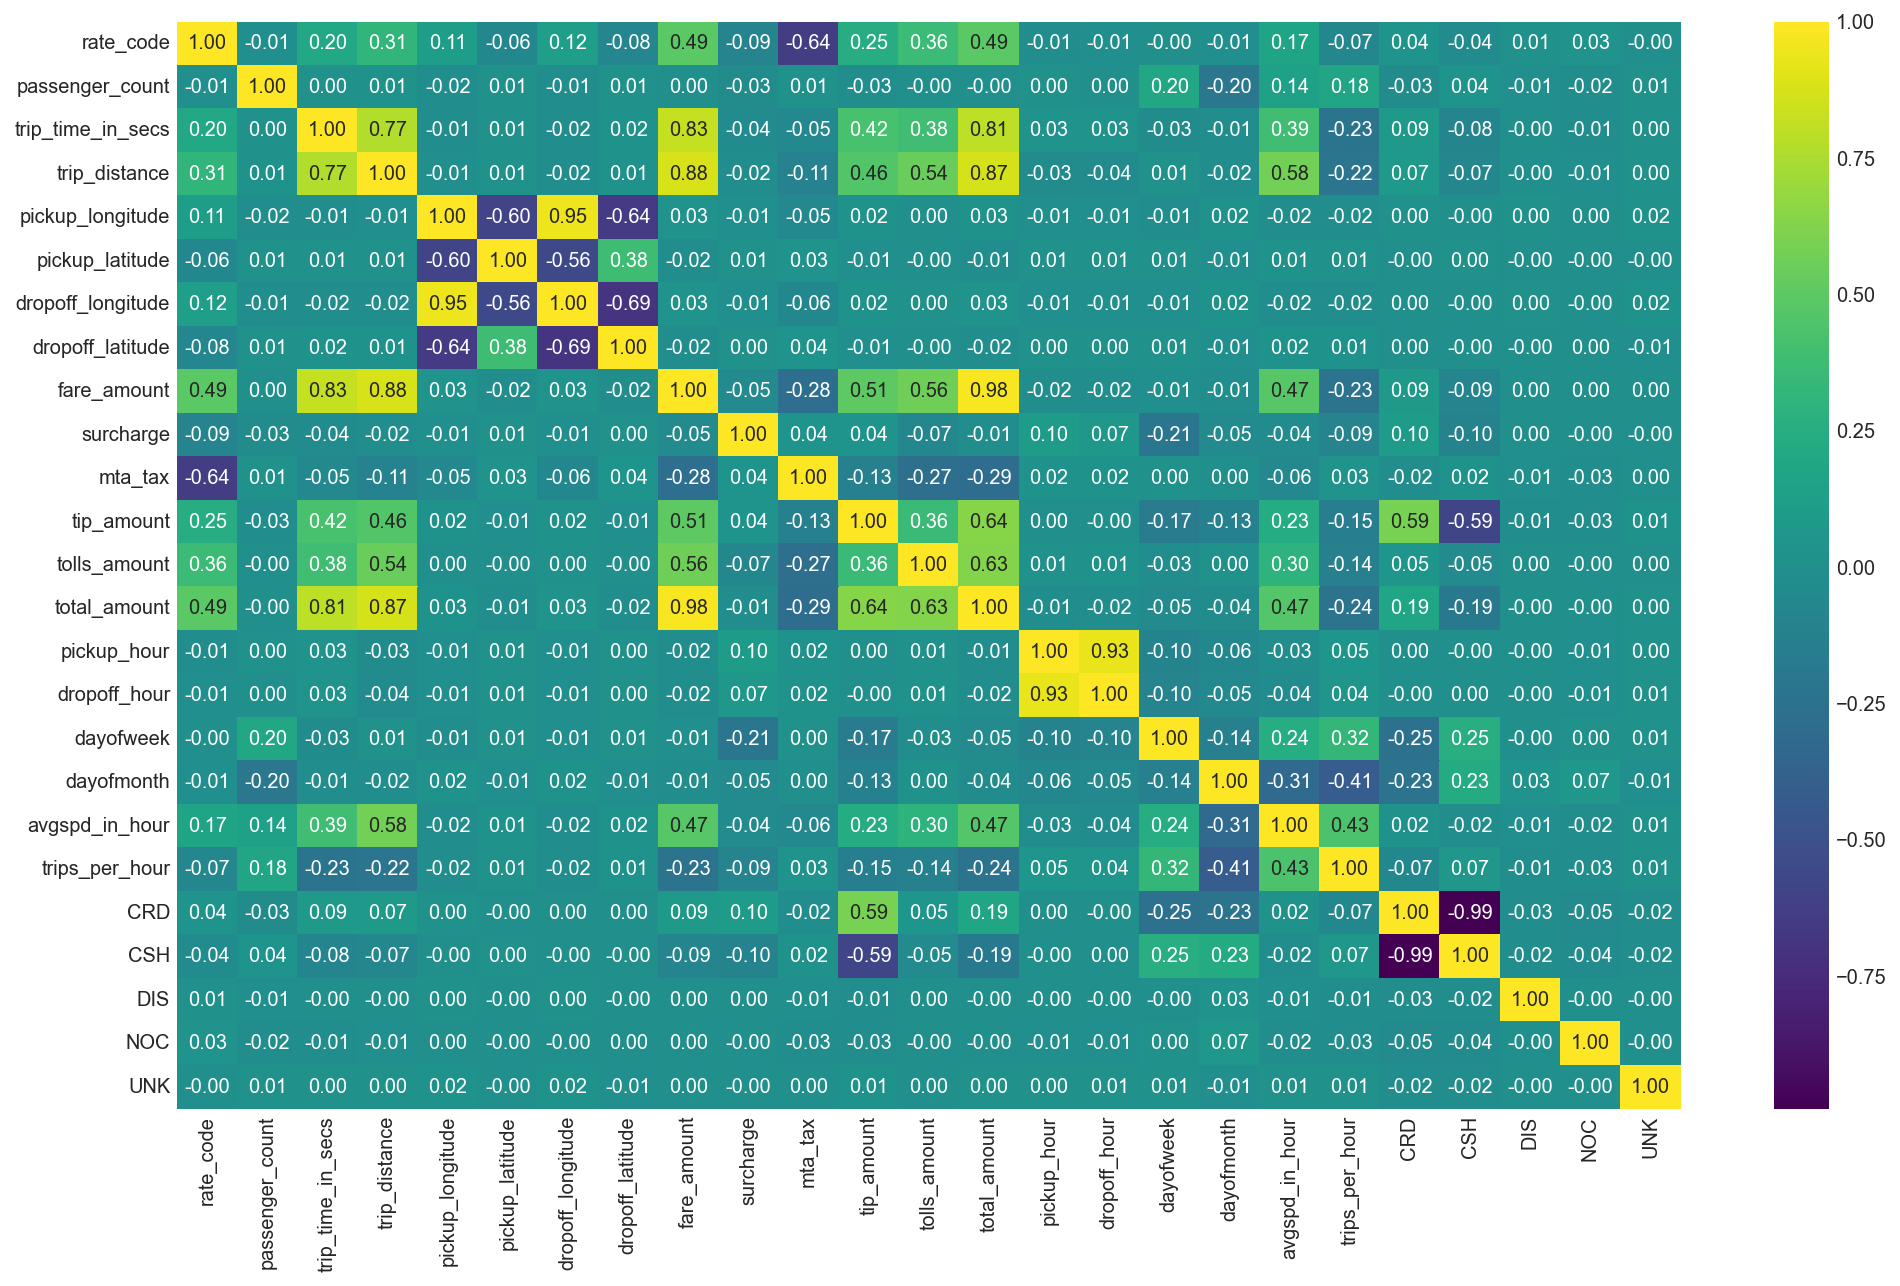

In [46]:
plt.figure(figsize=(15,10))
sns.heatmap(df_new.corr(), annot = True, fmt = '.2f', cmap = 'viridis')

Tip Amount is correlated With:

- trip time in secs
- trip distance
- tolls_amount
- total_amount
- avgspd_in_hour
- rate_code
- total_amount
- fare_amount
- CRD
- CSH

In this plot see that tip amount is moderately-highly correlated with the type of payment. This makes sense in the real world because people will potentially want to give tips if there is anyone of the two popular payment methods available.

### Create Training and Test set

In [47]:
Xtip = df_new[['avgspd_in_hour','trips_per_hour','trip_distance','dayofweek','dayofmonth', 
               'tolls_amount','trip_time_in_secs','fare_amount','CRD','CSH','rate_code']]
ytip = df_new.tip_amount

In [48]:
from sklearn.model_selection import train_test_split
Xtip_train, Xtip_test, ytip_train, ytip_test = train_test_split(Xtip, ytip, test_size = 0.3, random_state = 42)


In [49]:
print(Xtip_train.shape)
print(Xtip_test.shape)
print(ytip_train.shape)
print(ytip_test.shape)

(140000, 11)
(60000, 11)
(140000,)
(60000,)


### Scikit Learn Pipeline

### Testing Different Regression Algorithms to choose the best one


In [50]:
# Testing Different Regression Algorithms to choose the best one

lr_pipeline = Pipeline([("scaler", StandardScaler()), ("linear_regression", LinearRegression())])
xgboost_pipeline = Pipeline([("scaler", StandardScaler()), ("xgboost_regression", XGBRegressor())])
thiel_pipeline = Pipeline([("scaler", StandardScaler()), ("thiel_regressor", TheilSenRegressor(random_state = 42))])
ridge_pipeline = Pipeline([("scaler", StandardScaler()), ("ridge_regressor", Ridge(random_state = 42))])
lasso_pipeline = Pipeline([("scaler", StandardScaler()), ("lasso_regressor", Lasso(random_state = 42))])
elastic_pipeline = Pipeline([("scaler", StandardScaler()), ("elastic_net", ElasticNet(random_state = 42))])
decisiontree_pipeline = Pipeline([("scaler", StandardScaler()), ("decisiontree_regression", DecisionTreeRegressor(random_state = 42))])
sgc_pipeline = Pipeline([("scaler", StandardScaler()), ("sgd_regression", SGDRegressor(random_state = 42))])

In [51]:
pipelines = [lr_pipeline, xgboost_pipeline, thiel_pipeline, ridge_pipeline, lasso_pipeline,
            elastic_pipeline, decisiontree_pipeline, sgc_pipeline]

In [52]:
pipe_dict = {0: "Linear Regression", 1: "XGBoost", 2: "Theil Sen", 3: "Ridge",
            4: "Lasso", 5: "ElasticNet", 6: "Decision Tree", 7: "SGD"}

In [53]:
scores_df_tip = pd.DataFrame(columns = ["Model", "CVScores"])

In [54]:
for i, pipe in enumerate(pipelines):
    score = cross_val_score(pipe, Xtip, ytip, cv = 2)
    print(pipe_dict[i], ": ", score.mean())

Linear Regression :  0.563502844257018
XGBoost :  0.6911002138297843
Theil Sen :  0.5050366321731068
Ridge :  0.5635028810817816
Lasso :  0.1344812279259217
ElasticNet :  0.38487218173935095
Decision Tree :  0.42297251333256913
SGD :  0.555351040699029


Based on the above cross validation, we can see that XGboost works best among all the models. Therefore, we will choose XGboost to perform hyperparameter tuning to find the best model among three.

In [55]:
pipeline_new = Pipeline([("scaler", StandardScaler()), ("classifier", XGBRegressor())])

In [56]:
pipeline_new.get_params().keys()

dict_keys(['memory', 'steps', 'verbose', 'scaler', 'classifier', 'scaler__copy', 'scaler__with_mean', 'scaler__with_std', 'classifier__objective', 'classifier__base_score', 'classifier__booster', 'classifier__colsample_bylevel', 'classifier__colsample_bynode', 'classifier__colsample_bytree', 'classifier__enable_categorical', 'classifier__gamma', 'classifier__gpu_id', 'classifier__importance_type', 'classifier__interaction_constraints', 'classifier__learning_rate', 'classifier__max_delta_step', 'classifier__max_depth', 'classifier__min_child_weight', 'classifier__missing', 'classifier__monotone_constraints', 'classifier__n_estimators', 'classifier__n_jobs', 'classifier__num_parallel_tree', 'classifier__predictor', 'classifier__random_state', 'classifier__reg_alpha', 'classifier__reg_lambda', 'classifier__scale_pos_weight', 'classifier__subsample', 'classifier__tree_method', 'classifier__validate_parameters', 'classifier__verbosity'])

In [57]:
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

In [58]:
grid_params = [
    {"classifier": [XGBRegressor()],
    "classifier__learning_rate": (0.05, 0.10, 0.15),
    "classifier__max_depth": [ 3, 4, 5, 6, 8],
    "classifier__min_child_weight": [ 1, 3, 5, 7],
    "classifier__gamma":[ 0.0, 0.1, 0.2],
    "classifier__colsample_bytree":[ 0.3, 0.4],}   
]

### Cross Validation - Randomized Search CV


In [59]:
random_search = RandomizedSearchCV(estimator = pipeline_new, param_distributions = grid_params, scoring = 'neg_mean_absolute_error', n_jobs= -1, cv = 3, verbose = 0)

In [60]:
best_model = random_search.fit(Xtip_train, ytip_train)

In [61]:
best_model.best_params_

{'classifier__min_child_weight': 7,
 'classifier__max_depth': 6,
 'classifier__learning_rate': 0.1,
 'classifier__gamma': 0.1,
 'classifier__colsample_bytree': 0.4,
 'classifier': XGBRegressor(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=0.4,
              enable_categorical=False, gamma=0.1, gpu_id=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_delta_step=None, max_depth=6,
              min_child_weight=7, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              predictor=None, random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)}

In [62]:
pipeline_xgboost = Pipeline([('scaler', StandardScaler()), ('xgboost_regression', XGBRegressor(min_child_weight=1, max_depth=4,
                                                                                            learning_rate=0.15, gamma=0.1, colsample_bytree=0.4))])

In [63]:
model = pipeline_xgboost.fit(Xtip_train, ytip_train)

In [64]:
predict = model.predict(Xtip_test)

In [65]:
resid = (ytip_test - predict)

### Prediction Diagnosis and evaluation

In [66]:
def print_evaluate(true, prediction):
    mae = mean_absolute_error(true, prediction)
    mse = mean_squared_error(true, prediction)
    rmse = np.sqrt(mean_squared_error(true, prediction))
    r2_square = r2_score(true, prediction)

    print("MAE: {}".format(mae))
    print("MSE: {}".format(mse))
    print("RMSE: {}".format(rmse))
    print("R2 Square: {}".format(r2_square))

In [67]:
def plot_diag(true, prediction):
    
    #residuals
    resid = (true-prediction)
    
    #plotting the distplot
    plt.figure(figsize=(14,8))
    plt.subplot(221)
    plt.title("Distplot")
    sns.distplot(resid)
    
    #plotting the residual plot
    plt.subplot(222)
    plt.title("Residual Plot")
    sns.scatterplot(prediction, resid)
    sns.lineplot([min(prediction), max(prediction)], y = [0,0], linestyle = '--', color = 'r')
    
    #plotting the quantile plot
    ax = plt.subplot(223)
    plt.title("Quantile Plot")
    sm.qqplot(resid, line = 'r', ax = ax)
    
    #plotting the autocorrelation plot
    ax2 = plt.subplot(224)
    plt.title("Autocorrelation Plot")
    plot_acf(resid, ax = ax2)
    plt.tight_layout()

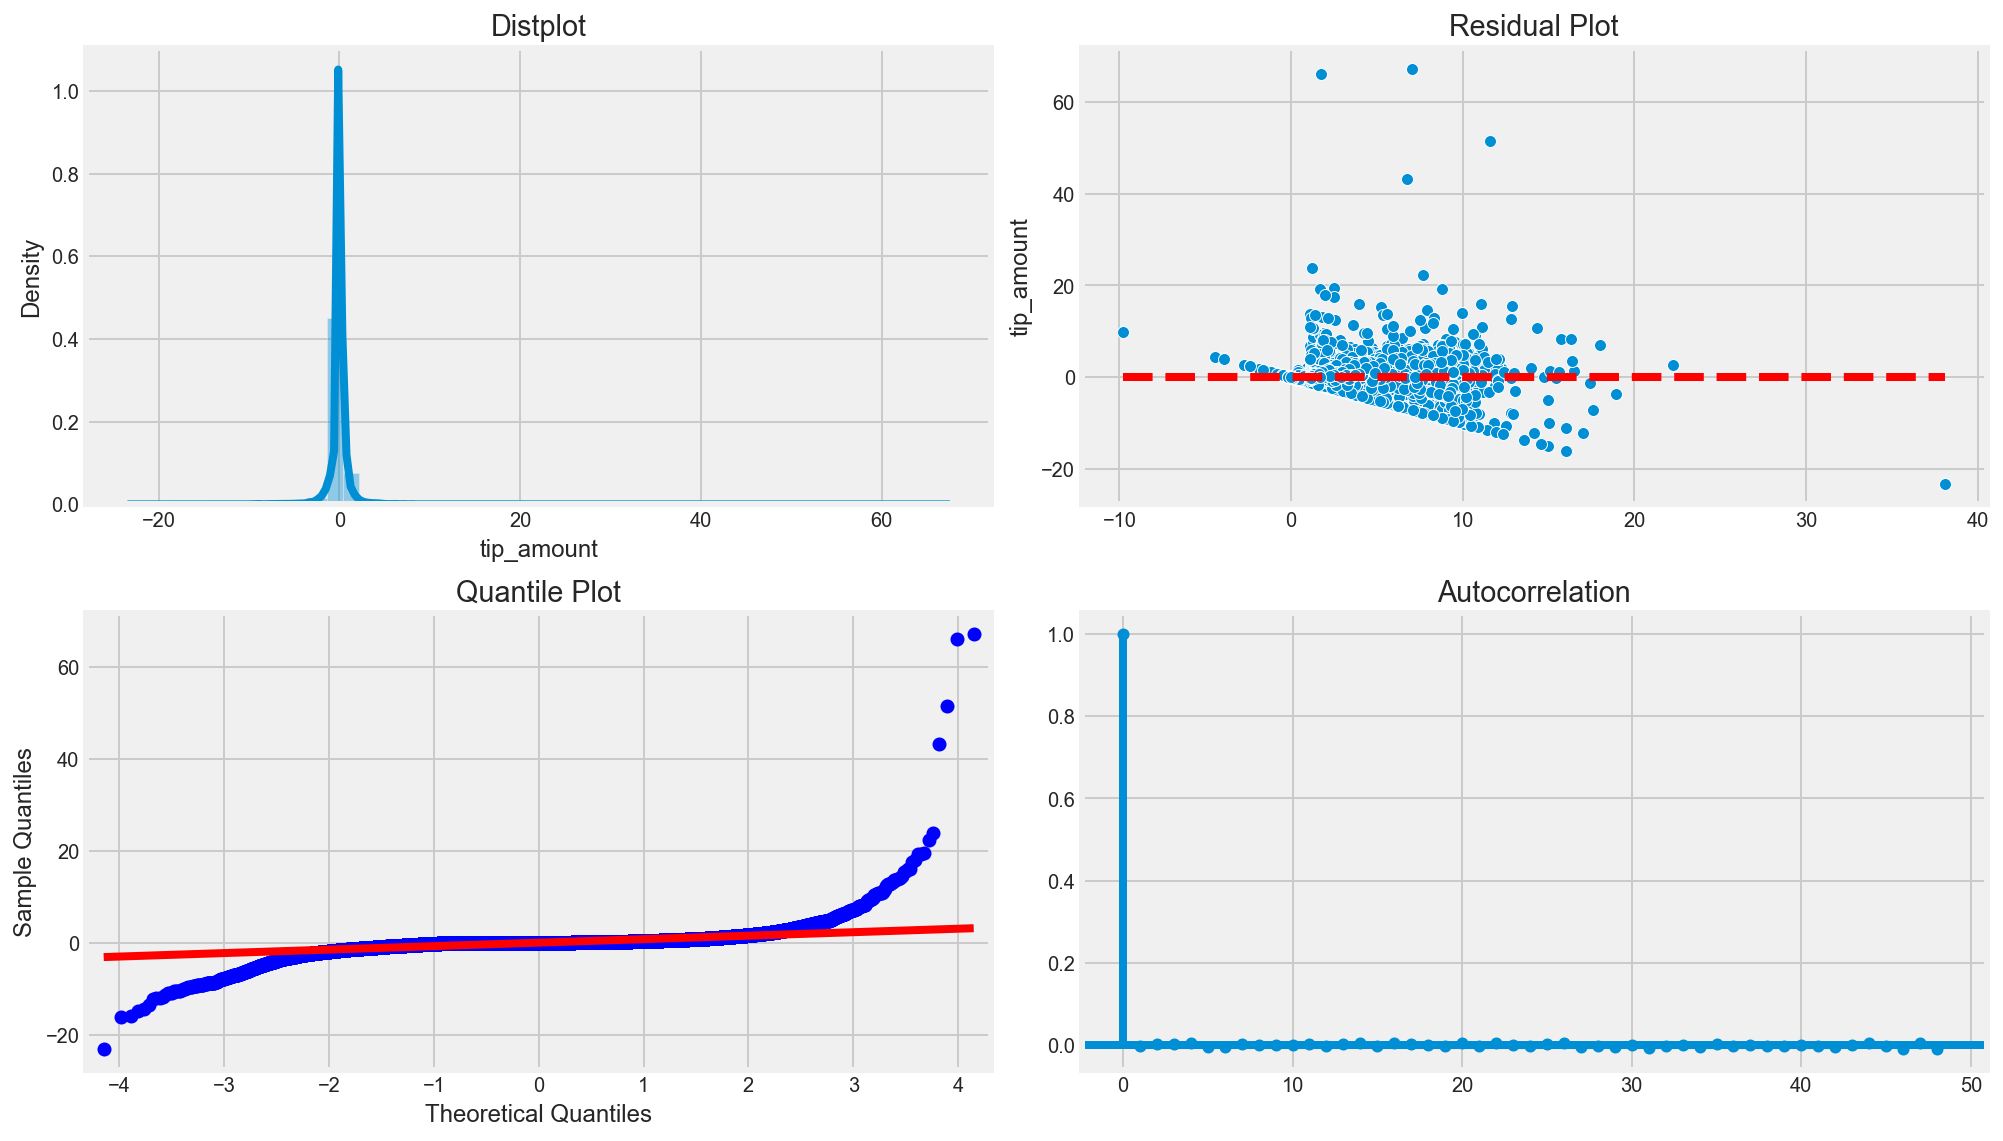

In [68]:
plot_diag(ytip_test, predict)

<AxesSubplot:xlabel='tip_amount'>

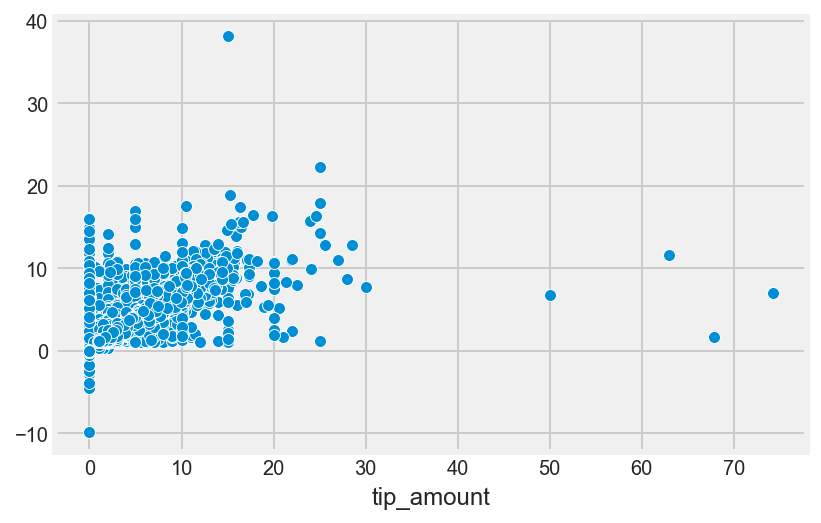

In [69]:
sns.scatterplot(ytip_test, predict)

In [70]:
print_evaluate(ytip_test, predict)

MAE: 0.4059083182563569
MSE: 1.189028245612473
RMSE: 1.0904257176041259
R2 Square: 0.7221010890323232


In [71]:
Xtip_test["Predicted tip"] = predict

In [72]:
Xtip_test["Original tip"] = ytip_test

In [73]:
rounder = lambda a: [round(x,2) for x in a]
Xtip_test["Predicted tip"] = rounder(Xtip_test["Predicted tip"])

### Comparing Predicted Price with the Original Price

In [74]:
Xtip_test.head(10)

,avgspd_in_hour,trips_per_hour,trip_distance,dayofweek,dayofmonth,tolls_amount,trip_time_in_secs,fare_amount,CRD,CSH,rate_code,Predicted tip,Original tip
310495,4.97,1,4.97,5,13,0.00,840,16.5,0,1,1,0.01,0.0
322678,1.02,1,1.02,5,13,0.00,3300,40.0,0,1,1,0.11,0.0
398645,6.48,5,1.04,6,14,0.00,300,6.0,1,0,1,1.23,0.5
13159,2.49,2,1.42,4,12,0.00,300,6.0,1,0,1,1.32,1.3
576679,9.10,1,9.10,4,26,0.00,2356,33.5,0,1,1,-0.01,0.0
593201,5.00,2,1.80,5,27,0.00,310,7.5,0,1,1,-0.00,0.0
977542,0.50,1,0.50,5,20,0.00,988,14.0,1,0,1,2.34,2.8
501871,24.40,1,24.40,6,14,5.33,2160,65.5,0,1,1,0.44,0.0
167498,6.65,3,3.76,5,13,0.00,1200,16.0,0,1,1,0.02,0.0
784268,2.80,1,2.80,4,19,0.00,991,13.5,1,0,1,2.48,3.0
